In [77]:
import numpy as np 
import matplotlib.pylab as plt
from scipy.integrate import odeint

In [92]:
def MassSpring(state, time):
    x, dxdt = state
    k = 124e3 # spring constant (kN/m)
    m = 64.3 # mass of the object (Kg)
    g = 9.8 # gravitational acceleration (m/sec2)
    b = 100 # damping constant ( N*s/m)
    
    # add a input force
    A = 5.0 # amplitude of force
    phi = 0.0 # phase shift
    omega = 1.0 # frequency of input force
    
    # calculate acceleration ddxdtt 
    ddxdtt = ((-k*x - b*dxdt)/m) + g + (A * np.cos(2*np.pi*omega*time - phi)) 
    
    # return both state derivatives
    return [dxdt, ddxdtt]

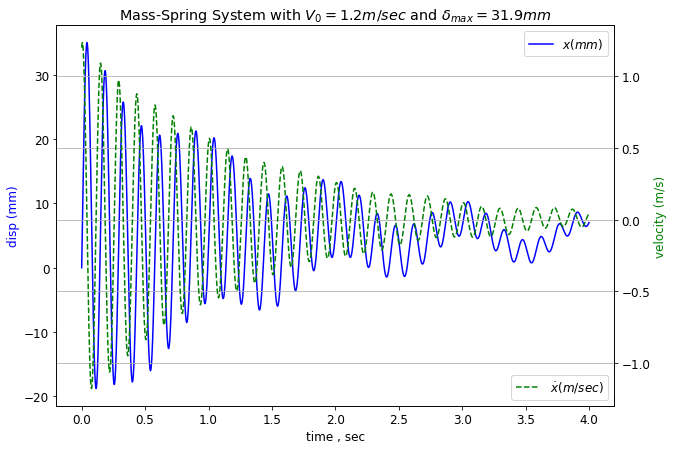

In [93]:
# define initial state and time interval
state_zero = [0.0, 1.2] #initial displacement and velocity [m, m/sec]
time = np.arange(0, 4, 0.001) # time range

state = odeint(MassSpring, state_zero, time)
x = np.array(state[:,[0]])
dxdt = np.array(state[:,[1]])

# plot the results
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['font.size'] = 12
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(time, x*1e3, 'b', label = r'$x (mm)$', linewidth=1.5)
ax2.plot(time, dxdt,'g--', label = r'$\dot{x} (m/sec)$', linewidth=1.5)
ax2.legend(loc='lower right')
ax1.legend()
ax1.set_xlabel('time , sec')
ax1.set_ylabel('disp (mm)',color='b')
ax2.set_ylabel('velocity (m/s)',color='g')
plt.title('Mass-Spring System with $V_0=1.2 m/sec \frac{m}{s}$ and $\delta_{max}=31.9mm$')
plt.grid()
